In [ ]:
'''
Installing packages for rendering the game on Colab
'''

!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install git+https://github.com/tensorflow/docs > /dev/null 2>&1
!pip install gym[classic_control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2


In [ ]:
!pip install wandb
import wandb
# Replace with your actual API key
api_key = "17dab9d1bbdc37c41831799a4b0b50d3e97400c5"

# Login to Weights & Biases
wandb.login(key=api_key)
project_name = 'D2AS2'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 989.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import namedtuple, deque
import torch.optim as optim
import datetime
import gym
from gym.wrappers.record_video import RecordVideo
import glob
import io
import base64
import matplotlib.pyplot as plt
from IPython.display import HTML
from pyvirtualdisplay import Display
import tensorflow as tf
from IPython import display as ipythondisplay
from PIL import Image
import tensorflow_probability as tfp
import wandb

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <


In [ ]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Define the Dueling DQN model
class DuelingDQN(nn.Module):
    def __init__(self, input_size, output_size, fc1_units, fc2_units, seed):
        super(DuelingDQN, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(input_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.advantage = nn.Linear(fc2_units, output_size)
        self.value = nn.Linear(fc2_units, 1)

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        advantage = self.advantage(x)
        value = self.value(x)
        q_values = value + (advantage - advantage.max(dim=-1, keepdim=True)[0])

        return q_values


In [ ]:
# Define the ReplayBuffer class
class ReplayBuffer:
    def __init__(self, action_size, buffer_size, batch_size, seed):
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)

    def add(self, state, action, reward, next_state, done):
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        return len(self.memory)


In [ ]:
# Define the agent
class Agent():
    def __init__(self, state_size, action_size, fc1_units, fc2_units, buffer_size, batch_size, lr, update_every, gamma, eps_end, eps_decay, seed):
        self.state_size = state_size
        self.action_size = action_size
        self.batch_size = batch_size
        self.lr = lr
        self.update_every = update_every
        self.gamma = gamma
        self.seed = random.seed(seed)
        self.q_network = DuelingDQN(state_size, action_size, fc1_units, fc2_units, seed).to(device)
        self.target_network = DuelingDQN(state_size, action_size, fc1_units, fc2_units, seed).to(device)
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=lr)
        ''' Replay memory '''
        self.memory = ReplayBuffer(action_size, buffer_size, batch_size, seed)
        self.t_step = 0
        self.eps_end = eps_end
        self.eps_decay = eps_decay

    def step(self, state, action, reward, next_state, done):
        self.memory.add(state, action, reward, next_state, done)

        if len(self.memory) >= self.batch_size:
            experiences = self.memory.sample()
            self.learn(experiences)

        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            self.target_network.load_state_dict(self.q_network.state_dict())

    def act(self, state, eps=0.0):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.q_network.eval()
        with torch.no_grad():
            action_values = self.q_network(state)
        self.q_network.train()
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences):
        states, actions, rewards, next_states, dones = experiences
        Q_targets_next = self.target_network(next_states).detach().max(1)[0].unsqueeze(1)
        Q_targets = rewards + (self.gamma * Q_targets_next * (1 - dones))
        Q_expected = self.q_network(states).gather(1, actions)
        loss = F.mse_loss(Q_expected, Q_targets)
        # wandb.log({'train loss': loss})
        self.optimizer.zero_grad()
        loss.backward()
        for param in self.q_network.parameters():
            param.grad.data.clamp_(-1, 1)  # Gradient clipping
        self.optimizer.step()


In [ ]:
def dqn(agent, env, n_episodes=10000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores_window = deque(maxlen=100)
    episode_list_epsgrdy = []
    average_scores_epsgrdy = []
    average_regret_epsgrdy = []
    cumulative_regret_epsgrdy = []
    cummulative_regret_window=[]
    regret_window = []
    cumulative_regret = 0  # Initialize cumulative regret
    eps = eps_start

    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        regret = 0  # Initialize regret for this episode
        # cumulative_regret = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            optimal_action = np.argmax(agent.q_network(torch.from_numpy(state).float().unsqueeze(0)).cpu().data.numpy())
            optimal_reward = env.step(optimal_action)[1]  # Get the reward for the optimal action
            regret += optimal_reward - reward  # Calculate regret for this time step
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward

            if done:
                break


        scores_window.append(score)
        average_score = np.mean(scores_window)
        average_scores_epsgrdy.append(average_score)


        regret_window.append(regret)
        average_regret = np.mean(regret_window)
        average_regret_epsgrdy.append(average_regret)

        cumulative_regret += average_regret  # Update cumulative regret

        # cummulative_regret_window.append(cumulative_regret)
        # cummulative_average_regret = np.mean(cummulative_regret_window)
        cummulative_average_regret = average_regret
        cumulative_regret_epsgrdy.append(cumulative_regret)

        episode_list_epsgrdy.append(i_episode)
        wandb.log({'average_score': average_score})
        wandb.log({'average_regret': average_regret})
        wandb.log({"cummulative_regret": cumulative_regret})

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score), end="")

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tRegret: {:.2f}'.format(i_episode, average_score, regret))

        if i_episode % 100 == 0  and np.mean(scores_window) >= -100:
            wandb.log({"episode_no": i_episode})
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            break
        eps = max(eps_end, eps_decay*eps)

    return episode_list_epsgrdy, average_scores_epsgrdy, average_regret_epsgrdy

In [ ]:

# Initialize wandb with your project name
wandb.init(project=project_name)

wandb: Currently logged in as: rishi1906 (iitm_aero). Use `wandb login --relogin` to force relogin


In [ ]:
env = gym.make('Acrobot-v1')
env.seed(0)
state_shape = env.observation_space.shape[0]
action_shape = env.action_space.n

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [ ]:
# Sweep configuration
sweep_config = {
    "method": "random",
    "metric": {"goal": "minimize", "name": "cumulative_regret"},
    "parameters": {
        'state_size': {
            'values': [state_shape]
        },
        'action_size': {
            'values': [action_shape]
        },
        'BUFFER_SIZE': {
            'values': [int(1e5)]
            # 'values': [int(1e4), int(1e5), int(1e6)]
        },
        'BATCH_SIZE': {
            'values': [64]
            # 'values': [32, 64, 128, 256]
        },
        'LR': {
            'values': [0.0001]
            # 'values': [0.1, 0.01, 0.001, 0.0001]
        },
        'UPDATE_EVERY': {
            'values': [20]
            # 'values': [4, 6, 10, 20]
        },
        'fc1_units': {
            # 'values': [128]
            'values': [128]
            # 'values': [64, 128, 256]
        },
        'fc2_units': {
            # 'values': [64]
            'values': [64]
            # 'values': [64, 128, 256]
        },
        'eps_start': {
            'values': [1]
        },
        'eps_end': {
            'values': [0.01]
            # 'values': [0.01, 0.05, 0.1]
        },
        'eps_decay': {
            'values': [0.995]
            # 'values': [0.9, 0.95, 0.99, 0.995, 0.999]
        },
        'gamma': {
            'values': [0.99]
        },
        'n_episodes': {
            'values': [5000]
            # 'values': [1000, 2000, 5000]
        },
        'max_t': {
            'values': [1000]
            # 'values': [500, 1000, 2000]
        },
    }
}
sweep_id = wandb.sweep(sweep=sweep_config, project=project_name)

Create sweep with ID: fp36bngn
Sweep URL: https://wandb.ai/iitm_aero/DeulingDQN/sweeps/fp36bngn


In [ ]:
average_scores = []
cumm_regret = []

In [ ]:


# Define the main function for hyperparameter tuning
def AvgOverExperiments():

    # env = gym.make('Acrobot-v1')
    # env.seed(0)
    # state_shape = env.observation_space.shape[0]
    # no_of_actions = env.action_space.n

    with wandb.init() as run:
        # Get the hyperparameters for this run
        config = wandb.config

        begin_time = datetime.datetime.now()
        # env = gym.make('Acrobot-v1')
        # env.seed(0)

        # Create the agent with the hyperparameters
        agent = Agent(state_size=config.state_size, action_size=config.action_size, fc1_units=config.fc1_units, fc2_units=config.fc2_units, buffer_size=config.BUFFER_SIZE, batch_size=config.BATCH_SIZE, lr=config.LR, update_every=config.UPDATE_EVERY, gamma=config.gamma, eps_end=config.eps_end, eps_decay=config.eps_decay,seed = 0)

        # Train the agent and get the scores
        # episode_list_epsgrdy, average_scores_epsgrdy = dqn(agent, env, n_episodes=config.n_episodes, max_t=config.max_t, eps_start=config.eps_start, eps_end=config.eps_end, eps_decay=config.eps_decay)

        episode_list_epsgrdy, average_scores_epsgrdy, cumulative_regret_epsgrdy = dqn(agent, env, n_episodes=config.n_episodes, max_t=config.max_t, eps_start=config.eps_start, eps_end=config.eps_end, eps_decay=config.eps_decay)

        time_taken = datetime.datetime.now() - begin_time

        print(time_taken)
        # Log the final average score to wandb
        # wandb.log({"Average Score": average_scores_epsgrdy})
        # wandb.log({"Average Score": cumulative_regret})
        print(average_scores_epsgrdy)
        print('\n')
        print(cumulative_regret_epsgrdy)
        average_scores.append(average_scores_epsgrdy)
        cumm_regret.append(cumulative_regret_epsgrdy)
        # return [average_scores_epsgrdy, cumulative_regret]


In [ ]:
def plot_avg_curves(avg_reward,reward_std, avg_step, step_std, step_size = 1 ):

    trunc_avg_reward = avg_reward[0::step_size]
    tunc_reward_std = reward_std[0::step_size]

    trunc_avg_step = avg_step[0::step_size]
    tunc_step_std = step_std[0::step_size]

    # Plot the average rewards with mean and standard deviation
    plt.figure()
    plt.plot(trunc_avg_reward, label='Mean')
    plt.fill_between(range(step_size), trunc_avg_reward + tunc_reward_std, trunc_avg_reward - tunc_reward_std, alpha=0.5, label=' Std Dev')
    plt.xlabel('Episode')
    plt.ylabel('Average Total Reward')
    plt.title('Average Total Reward vs Episode')
    plt.legend()
    # plt.savefig( "RvsE " +".pdf")
    # files.download(exp_no+"_RvsE.png")
    plt.show()



    # Plot the average rewards with mean and standard deviation
    plt.figure()
    plt.plot(trunc_avg_step, label='Mean')
    plt.fill_between(range(step_size), trunc_avg_step + tunc_step_std, trunc_avg_step - tunc_step_std, alpha=0.5, label=' Std Dev')
    plt.xlabel('Episode')
    plt.ylabel('Average Regret')
    plt.title(' Average Regret vs Episode')
    plt.legend()
    # plt.savefig("SvsE " + ".pdf")
    # files.download(exp_no+"_SvsE.png")
    plt.show()

    # Plot the average rewards with mean and standard deviation
    plt.figure()
    plt.plot(avg_step, label='Mean')
    # plt.fill_between(range(step_size), trunc_avg_step + tunc_step_std, trunc_avg_step - tunc_step_std, alpha=0.5, label=' Std Dev')
    plt.xlabel('Episode')
    plt.ylabel('Cummulative Regret')
    plt.title('Cummulative Average Regret vs Episode')
    plt.legend()
    # plt.savefig("SvsE " + ".pdf")
    # files.download(exp_no+"_SvsE.png")
    plt.show()


In [ ]:
# # Average over 5 exeriments

# average_scores, cumm_regret = [], []
num_expts = 5
for i in range(num_expts):
    print("Experiment: %d" % (i + 1))
    # episode_average_scores, episode_cumm_regret =  wandb.agent(sweep_id, function=AvgOverExperiments, count=1)
    wandb.agent(sweep_id, function=AvgOverExperiments, count=1)
    # average_scores.append(episode_average_scores)
    # cumm_regret.append(episode_cumm_regret)
wandb.finish()


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Experiment: 1


wandb: Agent Starting Run: iggss5lk with config:
wandb: 	BATCH_SIZE: 64
wandb: 	BUFFER_SIZE: 100000
wandb: 	LR: 0.0001
wandb: 	UPDATE_EVERY: 20
wandb: 	action_size: 3
wandb: 	eps_decay: 0.995
wandb: 	eps_end: 0.01
wandb: 	eps_start: 1
wandb: 	fc1_units: 128
wandb: 	fc2_units: 64
wandb: 	gamma: 0.99
wandb: 	max_t: 1000
wandb: 	n_episodes: 5000
wandb: 	state_size: 6


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 100	Average Score: -87.71	Regret: 0.00
0:00:36.925932
[-251.0, -251.0, -251.0, -251.0, -251.0, -251.0, -251.0, -243.875, -233.88888888888889, -225.8, -213.36363636363637, -203.16666666666666, -195.3846153846154, -188.92857142857142, -183.8, -178.375, -173.64705882352942, -167.5, -162.3684210526316, -157.15, -153.61904761904762, -150.45454545454547, -146.34782608695653, -148.0, -144.56, -141.92307692307693, -139.7037037037037, -136.67857142857142, -135.48275862068965, -133.4, -130.80645161290323, -128.5, -126.33333333333333, -125.02941176470588, -123.71428571428571, -121.58333333333333, -119.67567567567568, -118.52631578947368, -117.12820512820512, -116.025, -114.6829268292683, -113.42857142857143, -112.6046511627907, -111.54545454545455, -110.82222222222222, -110.1304347826087, -110.04255319148936, -108.83333333333333, -107.6938775510204, -107.18, -106.25490196078431, -106.09615384615384, -105.09433962264151, -104.85185185185185, -104.36363636363636, -103.51785714285714, -103.1

average_regret,▁▁▁▁▁▅▅▆██▆▅▆▆▇▆▅▆▇▆▆▇▇▇▇▇█▇▇▇▇▇▇▆▆▆▇▇▇▇
average_score,▁▁▁▁▃▃▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██████████████
cummulative_regret,▁▁▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇██
episode_no,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
average_regret,0.28
average_score,-87.71
cummulative_regret,21.57098
episode_no,100


Experiment: 2


wandb: Agent Starting Run: 52fxm6x2 with config:
wandb: 	BATCH_SIZE: 64
wandb: 	BUFFER_SIZE: 100000
wandb: 	LR: 0.0001
wandb: 	UPDATE_EVERY: 20
wandb: 	action_size: 3
wandb: 	eps_decay: 0.995
wandb: 	eps_end: 0.01
wandb: 	eps_start: 1
wandb: 	fc1_units: 128
wandb: 	fc2_units: 64
wandb: 	gamma: 0.99
wandb: 	max_t: 1000
wandb: 	n_episodes: 5000
wandb: 	state_size: 6


Episode 100	Average Score: -90.82	Regret: 0.00
0:00:37.604353
[-251.0, -251.0, -251.0, -251.0, -251.0, -251.0, -251.0, -245.875, -243.22222222222223, -241.6, -233.45454545454547, -226.58333333333334, -218.30769230769232, -211.42857142857142, -203.93333333333334, -195.4375, -188.1764705882353, -180.83333333333334, -176.31578947368422, -170.85, -166.28571428571428, -162.0909090909091, -157.91304347826087, -154.625, -152.4, -149.15384615384616, -146.85185185185185, -143.64285714285714, -140.86206896551724, -138.26666666666668, -137.0, -134.875, -133.21212121212122, -131.5, -130.02857142857144, -128.63888888888889, -127.43243243243244, -125.52631578947368, -124.56410256410257, -122.925, -121.1951219512195, -119.69047619047619, -118.65116279069767, -117.4090909090909, -116.26666666666667, -114.84782608695652, -114.59574468085107, -113.75, -112.71428571428571, -111.94, -111.27450980392157, -110.65384615384616, -109.98113207547169, -109.48148148148148, -108.87272727272727, -108.03571428571429

average_regret,▅▅▅▅▃▄▂▁▂▃▄▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇█▇▇▇▇▇▇▇██████
average_score,▁▁▁▁▂▂▃▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇█████████████
cummulative_regret,▃▃▃▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▇▇██
episode_no,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
average_regret,0.15
average_score,-90.82
cummulative_regret,4.37204
episode_no,100


Experiment: 3


wandb: Agent Starting Run: qz5pla4t with config:
wandb: 	BATCH_SIZE: 64
wandb: 	BUFFER_SIZE: 100000
wandb: 	LR: 0.0001
wandb: 	UPDATE_EVERY: 20
wandb: 	action_size: 3
wandb: 	eps_decay: 0.995
wandb: 	eps_end: 0.01
wandb: 	eps_start: 1
wandb: 	fc1_units: 128
wandb: 	fc2_units: 64
wandb: 	gamma: 0.99
wandb: 	max_t: 1000
wandb: 	n_episodes: 5000
wandb: 	state_size: 6


Episode 100	Average Score: -92.05	Regret: 1.00
0:00:37.455057
[-251.0, -251.0, -251.0, -251.0, -251.0, -251.0, -238.42857142857142, -222.375, -217.33333333333334, -211.3, -204.8181818181818, -193.66666666666666, -188.3846153846154, -183.35714285714286, -178.73333333333332, -174.375, -169.0, -164.27777777777777, -159.68421052631578, -157.4, -154.33333333333334, -150.5909090909091, -148.3913043478261, -144.75, -142.12, -140.1153846153846, -137.8148148148148, -135.21428571428572, -133.6206896551724, -132.36666666666667, -129.8709677419355, -127.59375, -126.36363636363636, -125.26470588235294, -124.02857142857142, -122.55555555555556, -121.78378378378379, -120.39473684210526, -119.43589743589743, -117.8, -117.53658536585365, -116.57142857142857, -115.37209302325581, -114.0909090909091, -113.06666666666666, -112.21739130434783, -111.38297872340425, -111.16666666666667, -110.46938775510205, -110.0, -109.54901960784314, -109.32692307692308, -108.66037735849056, -108.01851851851852, -107.29090

average_regret,▃▃▃▃▁▃▆▅▅▆▆▄▄▅▅▇▇▇█▇███▇▇▆▇▇▆▆▆▆▆▆▆▆▆▆▆▇
average_score,▁▁▁▂▃▄▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████████████
cummulative_regret,▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
episode_no,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
average_regret,0.2
average_score,-92.05
cummulative_regret,15.59065
episode_no,100


Experiment: 4


wandb: Agent Starting Run: kpigwa8d with config:
wandb: 	BATCH_SIZE: 64
wandb: 	BUFFER_SIZE: 100000
wandb: 	LR: 0.0001
wandb: 	UPDATE_EVERY: 20
wandb: 	action_size: 3
wandb: 	eps_decay: 0.995
wandb: 	eps_end: 0.01
wandb: 	eps_start: 1
wandb: 	fc1_units: 128
wandb: 	fc2_units: 64
wandb: 	gamma: 0.99
wandb: 	max_t: 1000
wandb: 	n_episodes: 5000
wandb: 	state_size: 6


Episode 100	Average Score: -94.23	Regret: 1.00
0:00:38.630041
[-251.0, -251.0, -251.0, -251.0, -251.0, -231.66666666666666, -222.57142857142858, -226.125, -216.55555555555554, -214.6, -203.72727272727272, -193.91666666666666, -186.0, -179.64285714285714, -174.26666666666668, -169.9375, -166.1764705882353, -162.61111111111111, -160.05263157894737, -156.9, -155.42857142857142, -151.5, -148.0, -144.625, -141.24, -139.84615384615384, -137.62962962962962, -136.03571428571428, -133.9655172413793, -132.33333333333334, -130.5483870967742, -128.90625, -127.0, -124.94117647058823, -124.0, -122.97222222222223, -121.48648648648648, -119.76315789473684, -118.1025641025641, -117.4, -116.48780487804878, -115.61904761904762, -114.55813953488372, -114.02272727272727, -113.53333333333333, -112.78260869565217, -112.17021276595744, -111.64583333333333, -110.95918367346938, -110.34, -109.88235294117646, -109.4423076923077, -109.05660377358491, -108.18518518518519, -107.52727272727273, -107.16071428571429, 

average_regret,▁▁▁▅▆▅▄▇█▇▇▇▇█▇▇███▇▇▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅
average_score,▁▁▂▂▃▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇██▇██████████████
cummulative_regret,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
episode_no,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
average_regret,0.25
average_score,-94.23
cummulative_regret,27.15211
episode_no,100


Experiment: 5


wandb: Agent Starting Run: o4td8itp with config:
wandb: 	BATCH_SIZE: 64
wandb: 	BUFFER_SIZE: 100000
wandb: 	LR: 0.0001
wandb: 	UPDATE_EVERY: 20
wandb: 	action_size: 3
wandb: 	eps_decay: 0.995
wandb: 	eps_end: 0.01
wandb: 	eps_start: 1
wandb: 	fc1_units: 128
wandb: 	fc2_units: 64
wandb: 	gamma: 0.99
wandb: 	max_t: 1000
wandb: 	n_episodes: 5000
wandb: 	state_size: 6


Episode 100	Average Score: -87.10	Regret: -1.00
0:00:36.353484
[-251.0, -251.0, -251.0, -251.0, -251.0, -251.0, -250.42857142857142, -247.75, -248.11111111111111, -234.1, -221.9090909090909, -210.5, -200.15384615384616, -191.21428571428572, -183.13333333333333, -177.25, -173.2941176470588, -167.88888888888889, -165.73684210526315, -161.95, -157.85714285714286, -153.77272727272728, -149.2173913043478, -145.375, -142.48, -139.92307692307693, -137.88888888888889, -135.85714285714286, -132.93103448275863, -130.4, -128.61290322580646, -126.71875, -124.93939393939394, -123.08823529411765, -122.08571428571429, -120.52777777777777, -119.4054054054054, -118.34210526315789, -116.71794871794872, -115.9, -114.5609756097561, -113.47619047619048, -112.81395348837209, -112.02272727272727, -110.73333333333333, -110.56521739130434, -109.85106382978724, -108.64583333333333, -107.83673469387755, -107.36, -106.6078431372549, -106.09615384615384, -105.13207547169812, -104.29629629629629, -103.3090909090909

average_regret,▄▄▄▁▂▄▅▄▅▄▅▅▅▅▆▅▆▅▇▇▇▇▇▇▇▇▇▇▇▇██▇███████
average_score,▁▁▁▁▂▃▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████████████
cummulative_regret,▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇██
episode_no,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
average_regret,0.2
average_score,-87.1
cummulative_regret,11.29444
episode_no,100


Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7b4b8d778af0>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7b4b8d778af0>> (for pre_run_cell):


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BrokenPipeError: [Errno 32] Broken pipe

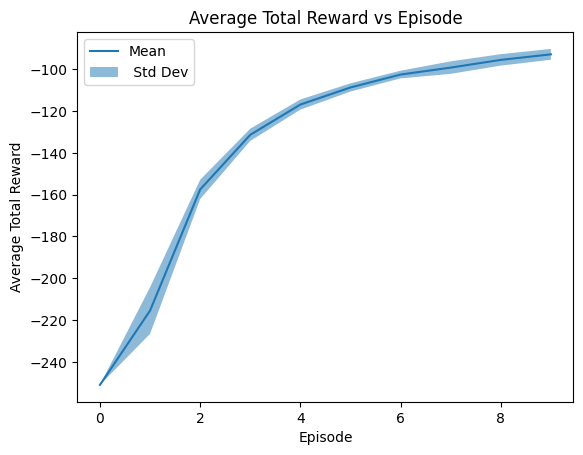

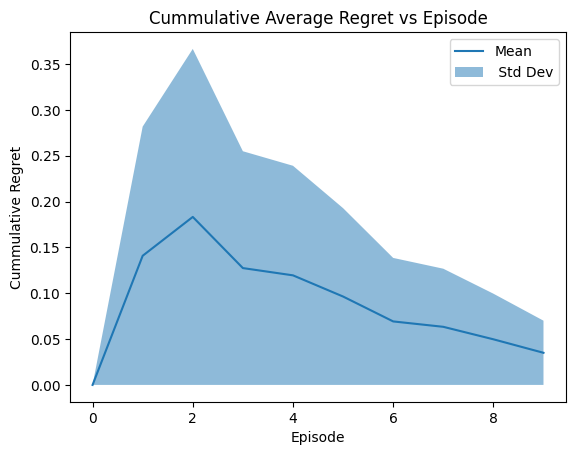

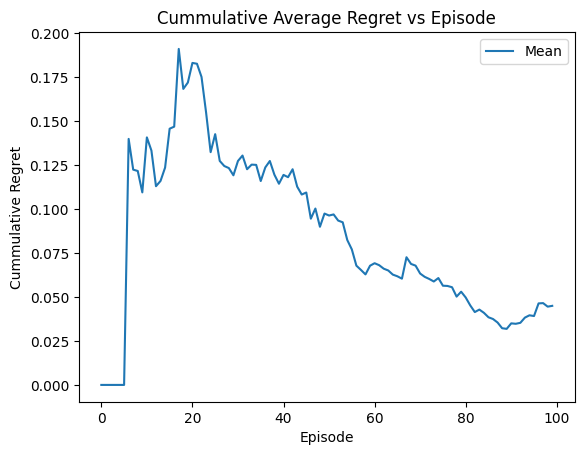

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7b4b8d778af0>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [ ]:
average_scores = np.array(average_scores)
cumm_regret = np.array(cumm_regret)

mean_average_scores = np.mean(average_scores, axis=0)
std_mean_average_scores = np.std(average_scores, axis=0)

mean_cumm_regret = np.mean(cumm_regret, axis=0)
mean_cumm_regret = np.std(cumm_regret, axis=0)

plot_avg_curves(mean_average_scores, std_mean_average_scores, mean_cumm_regret, mean_cumm_regret, step_size = 10)